<a href="https://colab.research.google.com/github/TamaraDelToro/BHF_Fundamentals_of_Data_Analysis/blob/main/Fundamentals_of_data_anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some title

# Understanding data types and properties of data
**Data distributions and why they matter**

The distribution of your observations alone holds a lot of information about the data you are looking at.

I won't explain what differet distributions there are as you probably already know the main ones, and these will become clearer as you work with your data.

Instead lets have a little play to say how exploring data distributions might be a useful first explorations for your data analysis.

Firstly, lets define the experiment:

We are collecting heart rate data from participants taking a new drug for heart failure.


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random normal distribution data for resting heart rates (in bpm)
np.random.seed(42)  # For reproducibility
heart_rates_normal = np.random.normal(loc=70, scale=10, size=500)  # Normal distribution

# add extra values
heart_rates_data = np.append(heart_rates_normal, [200, 210, 215])  # Adding extra readings

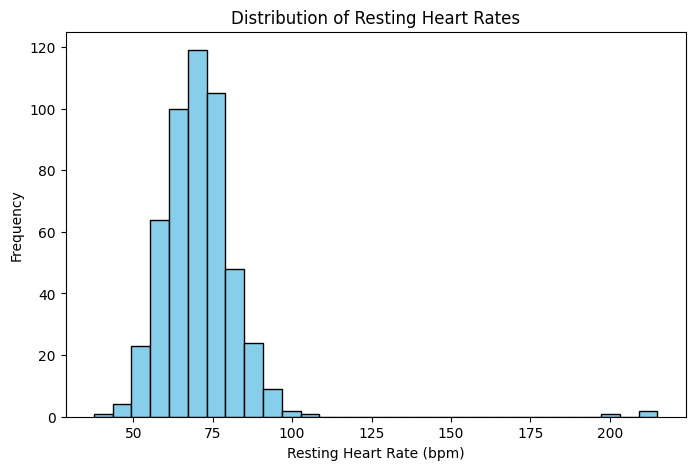

In [ ]:
# Plot the data with faulty values
plt.figure(figsize=(8, 5))
plt.hist(heart_rates_data, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Resting Heart Rates")
plt.xlabel("Resting Heart Rate (bpm)")
plt.ylabel("Frequency")
plt.show()

As you can see the distribution in our graph isn't normal.
After a few more exploration steps you realise all the outliers come from the same heart rate monitor, which is faulty.

# Exploratory Data analysis

Lets see how carrying out some initial exploratory analysis of our data can help us plan further work.

Story of the analysis.

In [ ]:
# Load the dataset directly from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

# Load the dataset
df = pd.read_csv(url, names=columns)

# Show the first few rows of the dataset
df.head()

In [ ]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}") # lets you see how many rows and colums you have. Do you have as expected?

# Check for missing values or unusual data types
df.info()

In [ ]:
# Summary statistics for numerical columns
df.describe() # Produce summary statistics (mean, median, standard deviation, ect) for numerical columns

Why do you think this might be an important step in data analysis?

As part of your data pre-procesing, you will handle any missing data.
Lets see how you can do that in python:

In [ ]:
# Replace '?' with NaN to identify missing data
df.replace("?", pd.NA, inplace=True)

# Convert appropriate columns to numeric where necessary
df["ca"] = pd.to_numeric(df["ca"], errors='coerce')
df["thal"] = pd.to_numeric(df["thal"], errors='coerce')

# Check how many missing values exist
df.isnull().sum()



,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


How many missing values do you have in this dataset?

While we now know we dont always need to drop all missing values, but we can impute instead, we will just drop them in this case as theres not too many!

In [ ]:
# Optionally drop rows with missing data
df.dropna(inplace=True)

Vizualising your data is a great way to explore its distributions and initial patterns.

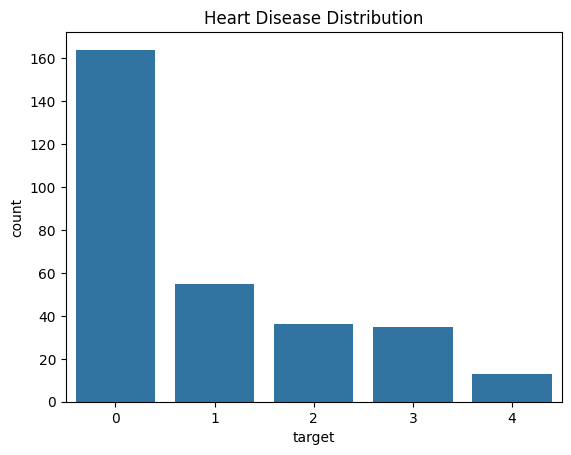

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for the target variable
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution")
plt.show()

In [ ]:
# Distribution of age
sns.histplot(df['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

As part of your exploratory analysis you might also explore how some of your variables might correlate to each other.

A correlation heatmap is a great way to look at that!

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Or if you are a more advanced analyst you might use a pairplot!

In [ ]:
# Pairplot of key features
sns.pairplot(df[["age", "chol", "thalach", "trestbps", "target"]], hue="target", palette='Set1')
plt.show()

Lastly you might want to have a look at specific features instead.

Let’s dive into specific features that might be relevant for cardiovascular research, such as cholesterol (chol), maximum heart rate (thalach), and resting blood pressure (trestbps).

In [ ]:
# Boxplot of cholesterol levels by heart disease status
sns.boxplot(x="target", y="chol", data=df)
plt.title('Cholesterol Levels vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

In [ ]:
# Scatter plot of max heart rate (thalach) and age, colored by heart disease
plt.figure(figsize=(8, 5))
sns.scatterplot(x="age", y="thalach", hue="target", data=df, palette='Set1')
plt.title("Max Heart Rate (Thalach) vs. Age")
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (Thalach)')
plt.show()

Through this simple exploratory data analysis we have covered quite a bit of ground towards doing some analysis, including exploring some relationships between features and the presence of heart disease by visualising the data.

This exploratory analysis helps identify potential trends and relationships that can guide further modeling or hypothesis testing in cardiovascular research.